Analysis/Conclusions:

1. For today (10/2/18), BBC had the most texts with a negative compound seniment analysis score. 
2. CNN had more postive compound seniment scores for their texts today. 
3. The scatter plot illustrating the sentiment of the last 100 tweets of the 5 news Twitters showed a wide range of sentiments, as the values from all 5 organizations are visible higher (more positive) and lower (more negative). 

In [1]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Dependencies
import tweepy
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
# Set target users

target_users = ["bbcworld", "cbsnews", "cnn", "foxnews", "nytimes"]

dictionary = {"Target User" : [],
              "Tweet Text" : [],
       "Compound Score" : [],
       "Positive Score" : [],
       "Negative Score" : [],
       "Neutral Score" : [],
        "Date and Time" : []}

# Loop through target users
for user in target_users:
    
#     #Loop through 5 pages of tweets
     for x in range(1, 6):

#         # Get all tweets from home feed
         public_tweets = api.user_timeline(user, page=x)
        
#         #Loop through all tweets from user's home page
         for tweet in public_tweets:
            
            dictionary["Target User"].append(user)
            
             #Pull out tweet text and run vader analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]
            
             #Add to list
            dictionary["Compound Score"].append(compound)
            dictionary["Positive Score"].append(positive)
            dictionary["Negative Score"].append(negative)
            dictionary["Neutral Score"].append(neutral)
            
            #Pull of tweet text
            dictionary["Tweet Text"].append(tweet["text"])
            
             #Pull out data/time information
            raw_time = tweet["created_at"]
            tweet_times = []
            tweet_times.append(raw_time)
            
            #Convert timestamps
            for raw_time in tweet_times:
                converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
                dictionary["Date and Time"].append(converted_time)
            
#Create DataFrame            
final_data = pd.DataFrame(dictionary)

#Export CSV file
final_data.to_csv("output_data/news_df.csv")

final_data.head()

,Target User,Tweet Text,Compound Score,Positive Score,Negative Score,Neutral Score,Date and Time
0,bbcworld,Kerala flood aftermath: Battling snakes and se...,0.1531,0.196,0.152,0.652,2018-10-02 21:46:40+00:00
1,bbcworld,These goats work for @CityofEdmonton as weed-e...,0.3182,0.161,0.000,0.839,2018-10-02 21:09:22+00:00
2,bbcworld,Shannon and Cork airports hit by 'significant'...,-0.5106,0.000,0.292,0.708,2018-10-02 20:44:07+00:00
3,bbcworld,RT @BBCNews: Dunkin' Donuts workers sacked aft...,0.0000,0.000,0.000,1.000,2018-10-02 20:18:59+00:00
4,bbcworld,Partners announce $31bn investment in Canada L...,0.0000,0.000,0.000,1.000,2018-10-02 20:17:49+00:00


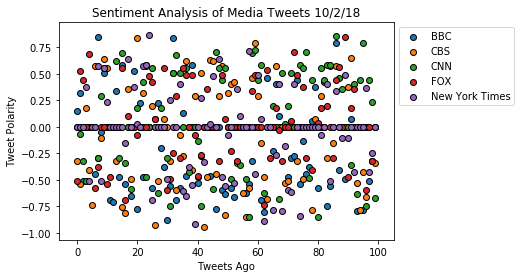

In [20]:
bbc_values = final_data.loc[final_data['Target User'] == "bbcworld"]
cbs_values = final_data.loc[final_data['Target User'] == "cbsnews"]
cnn_values = final_data.loc[final_data['Target User'] == "cnn"]
fox_values = final_data.loc[final_data['Target User'] == "foxnews"]
nyt_values = final_data.loc[final_data['Target User'] == "nytimes"]

BBC = plt.scatter(range(len(bbc_values)), (bbc_values["Compound Score"]), edgecolors="black")
CBS = plt.scatter(range(len(cbs_values)), (cbs_values["Compound Score"]), edgecolors="black")
CNN = plt.scatter(range(len(cnn_values)), (cnn_values["Compound Score"]), edgecolors="black")
FOX = plt.scatter(range(len(fox_values)), (fox_values["Compound Score"]), edgecolors="black")
NYT = plt.scatter(range(len(nyt_values)), (nyt_values["Compound Score"]), edgecolors="black")
plt.title("Sentiment Analysis of Media Tweets 10/2/18")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend([BBC, CBS, CNN, FOX, NYT], ["BBC", "CBS", "CNN", "FOX", "New York Times"], loc="upper left", bbox_to_anchor=(1,1))
# Save image
plt.savefig("output_data/Sentiment_analysis_scatter.png", bbox_inches="tight")

plt.show()

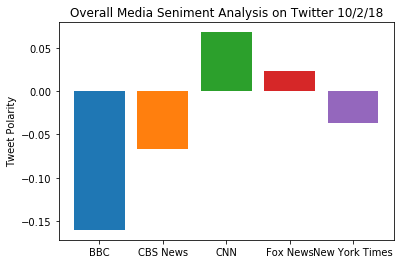

In [21]:
plt.bar("BBC", bbc_values["Compound Score"].mean())
plt.bar("CBS News", cbs_values["Compound Score"].mean())
plt.bar("CNN", cnn_values["Compound Score"].mean())
plt.bar("Fox News", fox_values["Compound Score"].mean())
plt.bar("New York Times", nyt_values["Compound Score"].mean())
plt.title("Overall Media Seniment Analysis on Twitter 10/2/18")
plt.ylabel("Tweet Polarity")

plt.savefig("output_data/Sentiment_bar.png")